<a href="https://colab.research.google.com/github/BrayannQuevedoBenito/Parcial2/blob/main/Parcial2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 25.2 MB/s 


In [39]:
import joblib
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from joblib import dump

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

from pandas_profiling import ProfileReport

import shap

In [40]:
url='https://raw.githubusercontent.com/BrayannQuevedoBenito/Parcial2/main/diabetes_test.csv'
df=pd.read_csv(url)
df2=pd.read_csv('https://raw.githubusercontent.com/BrayannQuevedoBenito/Parcial2/main/diabetes_pred.csv')

In [41]:
df2.head(7)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age,diabetes
0,2,175,88,0,0,22.9,0.326,22,NaN
1,2,175,88,0,0,22.9,0.326,23,NaN
2,2,175,88,0,0,22.9,0.326,24,NaN
3,2,175,88,0,0,22.9,0.326,25,NaN
4,2,175,88,0,0,22.9,0.326,26,NaN
5,2,175,88,0,0,22.9,0.326,27,NaN
6,2,175,88,0,0,22.9,0.326,28,NaN


In [42]:
df.shape

(154, 9)

In [43]:
from joblib import load

class PredictionModel:

    def __init__(self):
        self.model = load("diabetes-v1.0.joblib")

    def make_predictions(self, data):
        result = self.model.predict(data)
        return result

In [44]:
model=joblib.load('diabetes-v1.0.joblib')

In [45]:
features=df.drop(['diabetes'],axis=1)


In [46]:
features2=df2.drop(['diabetes'],axis=1)

In [47]:
Y=df['diabetes']

In [48]:
Y

0      0
1      0
2      1
3      0
4      1
      ..
149    1
150    0
151    1
152    0
153    0
Name: diabetes, Length: 154, dtype: int64

In [49]:
features

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age
0,5,88,78,30,0,27.6,0.258,37
1,3,61,82,28,0,34.4,0.243,46
2,8,183,64,0,0,23.3,0.672,32
3,6,80,80,36,0,39.8,0.177,28
4,8,108,70,0,0,30.5,0.955,33
...,...,...,...,...,...,...,...,...
149,8,109,76,39,114,27.9,0.640,31
150,5,95,72,33,0,37.7,0.370,27
151,5,0,80,32,0,41.0,0.346,37
152,1,80,74,11,60,30.0,0.527,22


In [50]:
predicion_model=PredictionModel()

In [51]:
results = predicion_model.make_predictions(features)
results

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
results2=predicion_model.make_predictions(features2)

In [53]:
results2

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [54]:
#rfc=RandomForestClassifier(criterion= 'entropy',max_depth=4,random_state= 60, max_features = 'log2',n_estimators=50)


              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.67      0.48      0.56        54

    accuracy                           0.73       154
   macro avg       0.71      0.68      0.68       154
weighted avg       0.73      0.73      0.72       154



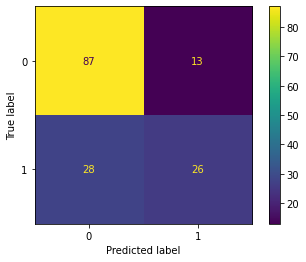

In [55]:
ConfusionMatrixDisplay.from_predictions(Y, results)
print(metrics.classification_report(Y, results))

In [56]:
explainer = shap.Explainer(model.predict, features)
shap_values = explainer(features)

Exact explainer: 155it [00:13,  2.80it/s]


In [57]:
df[df['diabetes']==1].mean()

pregnancies               4.629630
glucose                 136.444444
blood_pressure           69.148148
skin_thickness           22.111111
insulin                  92.814815
bmi                      35.687037
diabetes_pedigree_fn      0.501944
age                      33.962963
diabetes                  1.000000
dtype: float64

In [58]:
df[df['diabetes']==0].mean()

pregnancies               3.34000
glucose                 110.13000
blood_pressure           69.86000
skin_thickness           20.73000
insulin                  68.62000
bmi                      30.20500
diabetes_pedigree_fn      0.42759
age                      32.33000
diabetes                  0.00000
dtype: float64

In [59]:
shap_values

.values =
array([[-6.10714286e-03, -1.88154762e-01, -8.45238095e-04, ...,
        -2.71071429e-02, -1.17857143e-03,  2.48214286e-02],
       [-9.64285714e-03, -2.43142857e-01,  1.59523810e-03, ...,
         2.37142857e-02, -6.30952381e-03,  3.31904762e-02],
       [ 1.02428571e-01,  6.93595238e-01, -4.76190476e-04, ...,
        -9.21666667e-02,  1.46666667e-02,  7.91190476e-02],
       ...,
       [-7.30952381e-03, -2.55500000e-01,  6.90476190e-04, ...,
         2.95952381e-02, -1.59523810e-03,  3.35952381e-02],
       [-1.02023810e-02, -1.71297619e-01, -1.98809524e-03, ...,
         2.30119048e-02,  2.41666667e-03, -3.95595238e-02],
       [-3.48690476e-02, -1.32226190e-01,  1.70595238e-02, ...,
         2.91785714e-02, -1.72261905e-02, -6.77500000e-02]])

.base_values =
array([0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
       0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2,
 

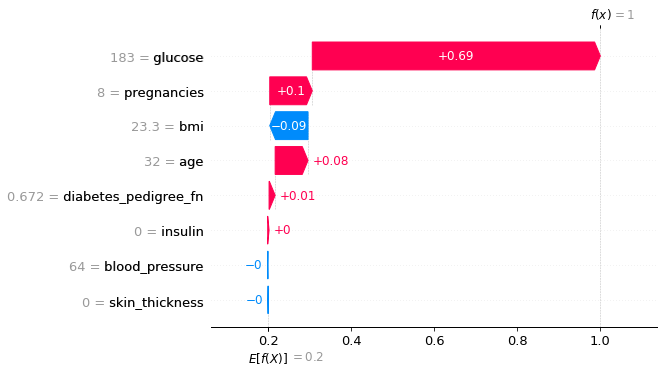

In [60]:
shap.plots.waterfall(shap_values[2])

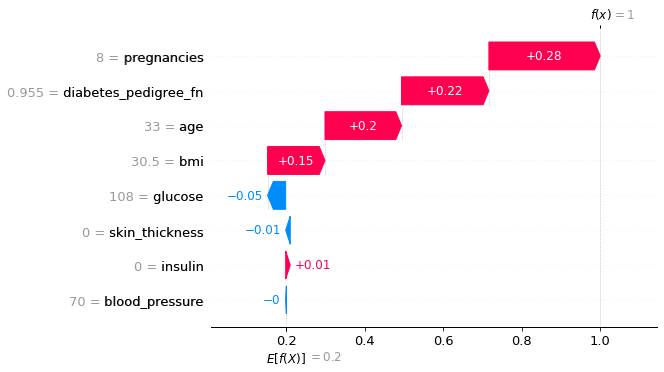

In [61]:
shap.plots.waterfall(shap_values[4])

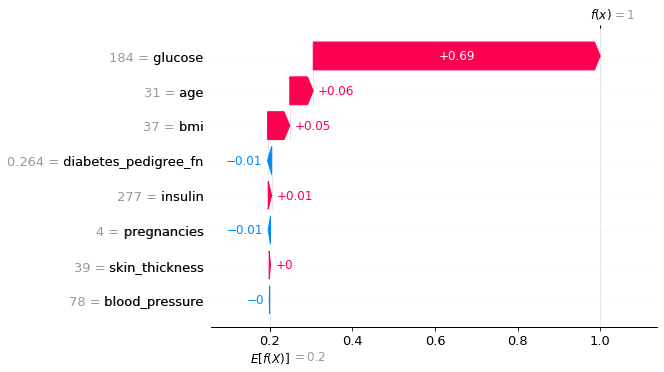

In [62]:
shap.plots.waterfall(shap_values[65])

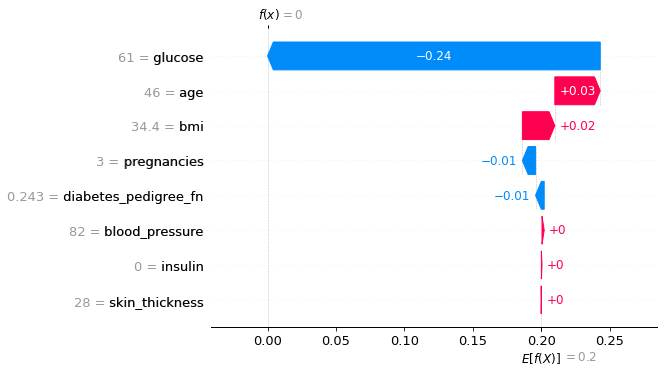

In [63]:
shap.plots.waterfall(shap_values[1])

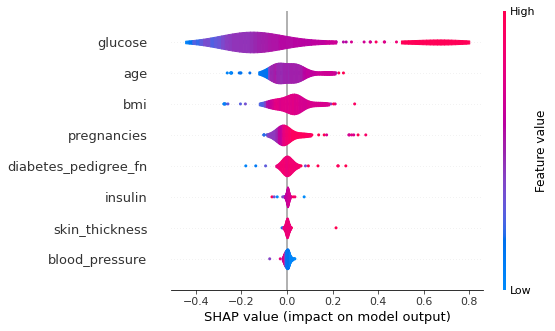

In [64]:
shap.summary_plot(shap_values, plot_type = 'violin')

## Punto 5

In [65]:
proba=model.predict_proba(features)[:,1]

In [66]:
df['probabilty']= proba

Ordenando de mayor a menor por la probabilidad predicta por el modelo para los diabeticos, encontramos que los primeros 20 personajes, existen 4 personas que no entran dentro de este rango para el AJUSTE DE THRESHOLD=0.645882, sin embargo, "modelo que le permita identificar la mayor cantidad posible de pacientes que realmente padecen la enfermedad, aún cuando se seleccionen algunos casos de diabetes de forma errada"

De esta manera el nuevo ajuste de Threshold sería: 0.645

In [69]:
df.sort_values(by='probabilty',ascending=False).head(20)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age,diabetes,probabilty
87,10,179,70,0,0,35.1,0.200,37,0,0.862836
113,8,186,90,35,225,34.5,0.423,37,1,0.859807
36,17,163,72,41,114,40.9,0.817,47,1,0.790415
124,7,179,95,31,0,34.2,0.164,60,0,0.790404
59,5,168,64,0,0,32.9,0.135,41,1,0.786872
39,0,180,90,26,90,36.5,0.314,35,1,0.768770
46,6,195,70,0,0,30.9,0.328,31,1,0.767063
73,1,196,76,36,249,36.5,0.875,29,1,0.767010
10,3,170,64,37,225,34.5,0.356,30,1,0.758357
65,4,184,78,39,277,37.0,0.264,31,1,0.751709


Definicion de cambio de probabilidades

In [74]:
def nuevo_ajuste(z):
  if z > 0.645:
    return(1)
  else:
    return(0)



In [75]:
df['probabilty']=df['probabilty'].apply(nuevo_ajuste)
df.head(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_fn,age,diabetes,probabilty
0,5,88,78,30,0,27.6,0.258,37,0,0
1,3,61,82,28,0,34.4,0.243,46,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1
3,6,80,80,36,0,39.8,0.177,28,0,0
4,8,108,70,0,0,30.5,0.955,33,1,0
5,1,101,50,15,36,24.2,0.526,26,0,0
6,0,141,84,26,0,32.4,0.433,22,0,0
7,0,107,76,0,0,45.3,0.686,24,0,0
8,9,124,70,33,402,35.4,0.282,34,0,0
9,10,75,82,0,0,33.3,0.263,38,0,0


In [76]:
proba_pred=df['probabilty']


              precision    recall  f1-score   support

           0       0.72      0.96      0.82       100
           1       0.80      0.30      0.43        54

    accuracy                           0.73       154
   macro avg       0.76      0.63      0.63       154
weighted avg       0.75      0.73      0.68       154



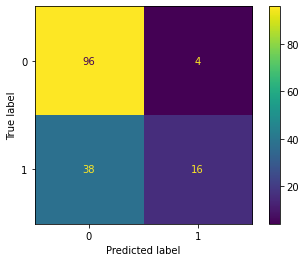

In [77]:
ConfusionMatrixDisplay.from_predictions(Y, proba_pred)
print(metrics.classification_report(Y, proba_pred))

Como se observa en el grafico anterior, al cambiar el threshold a 0.645 tenemos la confirmación del parrafo de arriba que es basicamente, 16 personas con diabetes confirmadas (1-1) y los 4 Falsos positivos(0-1) completando la capacidad maxima de 20 personas.



